<a href="https://colab.research.google.com/github/lucasmesq1/Analise_Venda_Medicamentos/blob/main/Explorando_Dados_de_Vendas_de_Medicamentos_Manipulados_Criando_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Explorando Dados de Vendas de Medicamentos Manipulados: Criando Insights**

**Alunos(as):** Adriano Carlos, Jéssica Carine, Juliane Maria e Lucas José
**Disciplina:** Tópicos de Big Data em Python |
**Professor(a):** Davi Camara



##**1. Bibliotecas Importadas**

In [ ]:
#Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from google.colab import drive
import seaborn as sns
plt.style.use('ggplot')


##**2. Lendo o Dataset**  

**2.1. IMPORTAÇÃO**

**BAIXAR OS DATASETS ABAIXO E EM SEGUIDA, REALIZAR UPLOAD DOS ARQUIVOS ABAIXO NO COLAB E EXECUTAR A CÉLULA ABAIXO**

Devido ao peso dos datasets,os mesmo não foram carregados diretamente no github, realizar o donwload nos links abaixo e carregar no Colab

[CLIQUE AQUI para baixar o anvisa2019](https://drive.google.com/file/d/1MAU9zUy0Uu9lSpNsdnfhbKYmbFmaNPfz/view?usp=drive_link)

[CLIQUE AQUI para baixar o anvisa2021](https://drive.google.com/file/d/15bU2KaOmy7_FhjnuU8yho0CZhugA42ck/view?usp=drive_link)


In [ ]:
# Carregar os arquivos CSV para o DataFrame

df_2019 = pd.read_csv('/content/anvisa2019.csv')
df_2021 = pd.read_csv('/content/anvisa2021.csv')



**2.2. Definindo tamanho do chunck para ambos as datasets**

In [ ]:
# Definindo o caminho dos datasets
anvisa2019 = '/content/anvisa2019.csv'
anvisa2021 = '/content/anvisa2021.csv'
chunksize = 10000  # Tamanho do chunk

# Carregando o dataset de 2019 em chunks
chunks_2019 = []
for chunk in pd.read_csv(anvisa2019, chunksize=chunksize):
    chunks_2019.append(chunk)  # Armazena cada chunk

# Concatenando todos os chunks em um único DataFrame para 2019
df_new2019 = pd.concat(chunks_2019, ignore_index=True)

# Exibindo as primeiras linhas do DataFrame de 2019
print("Primeiras linhas do dataset de 2019:")
print(df_new2019.head())

# Carregando o dataset de 2021 em chunks
chunks_2021 = []
for chunk in pd.read_csv(anvisa2021, chunksize=chunksize):
    chunks_2021.append(chunk)  # Armazena cada chunk

# Concatenando todos os chunks em um único DataFrame para 2021
df_new2021 = pd.concat(chunks_2021, ignore_index=True)

# Exibindo as primeiras linhas do DataFrame de 2021
print("\nPrimeiras linhas do dataset de 2021:")
print(df_new2021.head())

Primeiras linhas do dataset de 2019:
   ANO_VENDA  MES_VENDA UF_VENDA  MUNICIPIO_VENDA   DCB  \
0       2019          1       AC  CRUZEIRO DO SUL   712   
1       2019          1       AC  CRUZEIRO DO SUL   712   
2       2019          1       AC  CRUZEIRO DO SUL   712   
3       2019          1       AC  CRUZEIRO DO SUL  2162   
4       2019          1       AC  CRUZEIRO DO SUL  2545   

               PRINCIPIO_ATIVO QTD_ATIVO_POR_UNID_FARMACOTEC  \
0  CLORIDRATO DE AMITRIPTILINA                         0,075   
1  CLORIDRATO DE AMITRIPTILINA                        0,0125   
2  CLORIDRATO DE AMITRIPTILINA                          0,05   
3     BROMIDRATO DE CITALOPRAM                          0,01   
4                      CODEÍNA                          0,03   

  UNIDADE_MEDIDA_PRINCIPIO_ATIVO QTD_UNIDADE_FARMACOTECNICA  \
0                          GRAMA                        420   
1                          GRAMA                        840   
2                          GRAMA  

In [ ]:
#Retorna o tamanho do DF, linhas x colunas DO DATA SET DE 2019
df_new2019.shape

#Mostra um resumo conciso sobre o DF
df_new2019.info()

#Gera descrições para as colunas (dados numéricos e categóricos)
df_new2019.describe(include='all')

#Fornece uma contagem do número de valores nulos(ou ausentes) em cada coluna do DF
df_new2019.isnull().sum()

#Calcular a porcentagem de valores nulos em cada coluna
df_new2019.isnull().sum()/df_new2019.shape[0]*100

#Retorna o número total de linhas que são duplicadas em relação a linhas anteriores
df_new2019.duplicated().sum()

#######



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132854 entries, 0 to 4132853
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   ANO_VENDA                       int64  
 1   MES_VENDA                       int64  
 2   UF_VENDA                        object 
 3   MUNICIPIO_VENDA                 object 
 4   DCB                             int64  
 5   PRINCIPIO_ATIVO                 object 
 6   QTD_ATIVO_POR_UNID_FARMACOTEC   object 
 7   UNIDADE_MEDIDA_PRINCIPIO_ATIVO  object 
 8   QTD_UNIDADE_FARMACOTECNICA      object 
 9   TIPO_UNIDADE_FARMACOTECNICA     object 
 10  CONSELHO_PRESCRITOR             object 
 11  UF_CONSELHO_PRESCRITOR          object 
 12  TIPO_RECEITUARIO                int64  
 13  CID10                           object 
 14  SEXO                            float64
 15  IDADE                           float64
 16  UNIDADE_IDADE                   float64
dtypes: float64(3), int64(4), ob

0

In [ ]:
#Retorna o tamanho do DF, linhas x colunas DO DATASET
df_new2021.shape

#Mostra um resumo conciso sobre o DF
df_new2021.info()

#Gera descrições para as colunas (dados numéricos e categóricos)
df_new2021.describe(include='all')

#Fornece uma contagem do número de valores nulos(ou ausentes) em cada coluna do DF
df_new2021.isnull().sum()

#Calcular a porcentagem de valores nulos em cada coluna
df_new2021.isnull().sum()/df_new2021.shape[0]*100

#Retorna o número total de linhas que são duplicadas em relação a linhas anteriores
df_new2021.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985875 entries, 0 to 3985874
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   ANO_VENDA                       int64  
 1   MES_VENDA                       int64  
 2   UF_VENDA                        object 
 3   MUNICIPIO_VENDA                 object 
 4   DCB                             int64  
 5   PRINCIPIO_ATIVO                 object 
 6   QTD_ATIVO_POR_UNID_FARMACOTEC   object 
 7   UNIDADE_MEDIDA_PRINCIPIO_ATIVO  object 
 8   QTD_UNIDADE_FARMACOTECNICA      object 
 9   TIPO_UNIDADE_FARMACOTECNICA     object 
 10  CONSELHO_PRESCRITOR             object 
 11  UF_CONSELHO_PRESCRITOR          object 
 12  TIPO_RECEITUARIO                int64  
 13  CID10                           object 
 14  SEXO                            float64
 15  IDADE                           float64
 16  UNIDADE_IDADE                   float64
dtypes: float64(3), int64(4), ob

0

# **3. Tratando os Dados**

In [ ]:
#Removendo colunas 2019
df_2019 = df_new2019.drop(columns=['ANO_VENDA','MES_VENDA','DCB','CONSELHO_PRESCRITOR','UF_CONSELHO_PRESCRITOR','CID10'])
#Aqui foi colocado intencionalmente para visualziar apenas as 5 primeiras linhas,
#apenas queremos visualizar como as colunas são mostradas sem as colunas deletadas

df_2019.head(5)

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_ATIVO_POR_UNID_FARMACOTEC,UNIDADE_MEDIDA_PRINCIPIO_ATIVO,QTD_UNIDADE_FARMACOTECNICA,TIPO_UNIDADE_FARMACOTECNICA,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
0,AC,CRUZEIRO DO SUL,CLORIDRATO DE AMITRIPTILINA,"0,075",GRAMA,420,CÁPSULA,1,NaN,NaN,NaN
1,AC,CRUZEIRO DO SUL,CLORIDRATO DE AMITRIPTILINA,"0,0125",GRAMA,840,CÁPSULA,1,NaN,NaN,NaN
2,AC,CRUZEIRO DO SUL,CLORIDRATO DE AMITRIPTILINA,"0,05",GRAMA,630,CÁPSULA,1,NaN,NaN,NaN
3,AC,CRUZEIRO DO SUL,BROMIDRATO DE CITALOPRAM,"0,01",GRAMA,420,CÁPSULA,1,NaN,NaN,NaN
4,AC,CRUZEIRO DO SUL,CODEÍNA,"0,03",GRAMA,560,CÁPSULA,1,NaN,NaN,NaN


In [ ]:
#Removendo colunas 2021
df_2021 = df_new2021.drop(columns=['ANO_VENDA','MES_VENDA','DCB','CONSELHO_PRESCRITOR','UF_CONSELHO_PRESCRITOR','CID10'])
#Aqui foi colocado intencionalmente para visualziar apenas as 5 primeiras linhas,pois
#apenas queremos visualizar como as colunas são mostradas sem as colunas deletadas

df_2019.head(5)

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_ATIVO_POR_UNID_FARMACOTEC,UNIDADE_MEDIDA_PRINCIPIO_ATIVO,QTD_UNIDADE_FARMACOTECNICA,TIPO_UNIDADE_FARMACOTECNICA,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
0,AC,CRUZEIRO DO SUL,CLORIDRATO DE AMITRIPTILINA,"0,075",GRAMA,420,CÁPSULA,1,NaN,NaN,NaN
1,AC,CRUZEIRO DO SUL,CLORIDRATO DE AMITRIPTILINA,"0,0125",GRAMA,840,CÁPSULA,1,NaN,NaN,NaN
2,AC,CRUZEIRO DO SUL,CLORIDRATO DE AMITRIPTILINA,"0,05",GRAMA,630,CÁPSULA,1,NaN,NaN,NaN
3,AC,CRUZEIRO DO SUL,BROMIDRATO DE CITALOPRAM,"0,01",GRAMA,420,CÁPSULA,1,NaN,NaN,NaN
4,AC,CRUZEIRO DO SUL,CODEÍNA,"0,03",GRAMA,560,CÁPSULA,1,NaN,NaN,NaN


In [ ]:
#Percorre todas as colunas que contêm dados do tipo "object" (geralmente strings ou textos) e imprime a contagem de valores únicos para cada uma dessas colunas.
for i in df_2019.select_dtypes(include='object').columns:
    print(df_2019[i].value_counts())
    print('***' * 10)

#Percorre todas as colunas que contêm dados do tipo "object" (geralmente strings ou textos) e imprime a contagem de valores únicos para cada uma dessas colunas.
for i in df_2021.select_dtypes(include='object').columns:
    print(df_2021[i].value_counts())
    print('***' * 10)


UF_VENDA
SP    1591145
MG     434997
PR     404355
GO     284483
RJ     244953
RS     143688
SC     137437
BA     128045
ES     126634
MS      93502
PE      75739
MT      65324
DF      57554
RN      50579
PA      42735
PB      38833
RO      37135
CE      28689
AL      26683
PI      24515
MA      21703
AM      21196
TO      19939
SE      18445
AC       5515
RR       5000
AP       4031
Name: count, dtype: int64
******************************
MUNICIPIO_VENDA
SÃO PAULO           259367
GOIÂNIA             122112
CURITIBA             78466
RIO DE JANEIRO       48957
BELO HORIZONTE       46862
                     ...  
PALMITOS                 3
GÁLIA                    3
BACABAL                  2
DIAMANTINO               1
BARÃO DO TRIUNFO         1
Name: count, Length: 1243, dtype: int64
******************************
PRINCIPIO_ATIVO
TESTOSTERONA                   166613
CLORIDRATO DE AMITRIPTILINA    148615
CLORIDRATO DE FLUOXETINA       142890
ESTOLATO DE ERITROMICINA       137699
CLOR

In [ ]:
#Utilizado para obter estatísticas descritivas das colunas que contêm dados do tipo "object"
df_2019.describe(include='object')

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_ATIVO_POR_UNID_FARMACOTEC,UNIDADE_MEDIDA_PRINCIPIO_ATIVO,QTD_UNIDADE_FARMACOTECNICA,TIPO_UNIDADE_FARMACOTECNICA
count,4132854,4132854,4132854,4132854,4132854,4132854,4132854
unique,27,1243,611,70381,3,31727,4
top,SP,SÃO PAULO,TESTOSTERONA,"0,01",GRAMA,420,CÁPSULA
freq,1591145,259367,166613,181205,4128501,700542,3191749


In [ ]:
#Utilizado para obter estatísticas descritivas das colunas que contêm dados do tipo "object"
df_2021.describe(include='object')

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_ATIVO_POR_UNID_FARMACOTEC,UNIDADE_MEDIDA_PRINCIPIO_ATIVO,QTD_UNIDADE_FARMACOTECNICA,TIPO_UNIDADE_FARMACOTECNICA
count,3985875,3985875,3985875,3985875,3985875,3985875,3985875
unique,27,1257,662,80735,3,30158,4
top,SP,SÃO PAULO,TESTOSTERONA,"0,01",GRAMA,420,CÁPSULA
freq,1500045,234291,196437,168677,3982661,687100,3114364


**3.1. Histograma para a distribuição dos medicamentos em 2019**

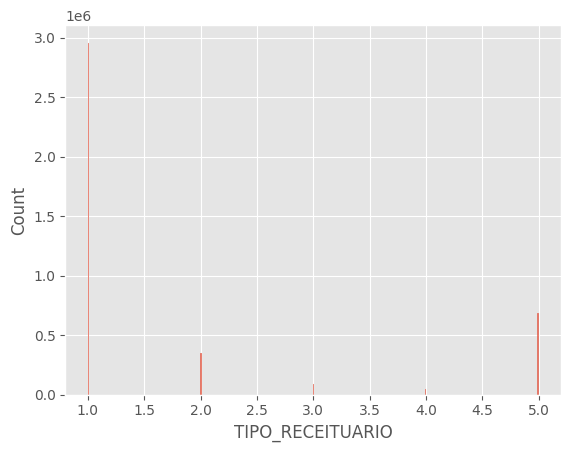

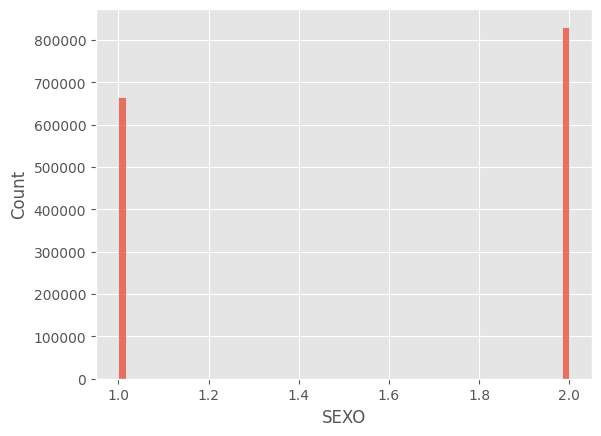

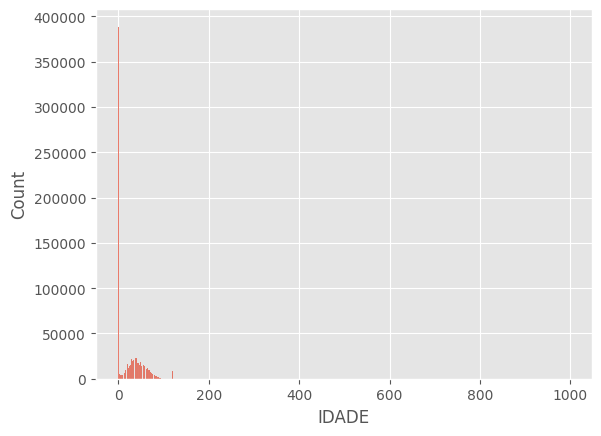

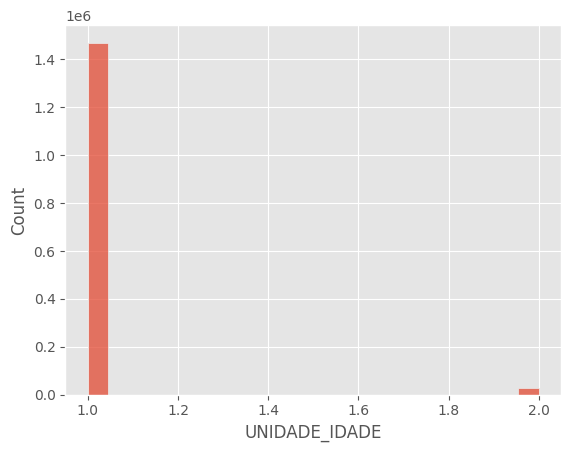

In [ ]:
#Histograma para a distribuição
import warnings
warnings.filterwarnings('ignore')

for i in df_2019.select_dtypes(include='number').columns:
    sns.histplot(data=df_2019, x=i)
    plt.show()


**3.2. Histograma para a distribuição dos medicamentos em 2019**

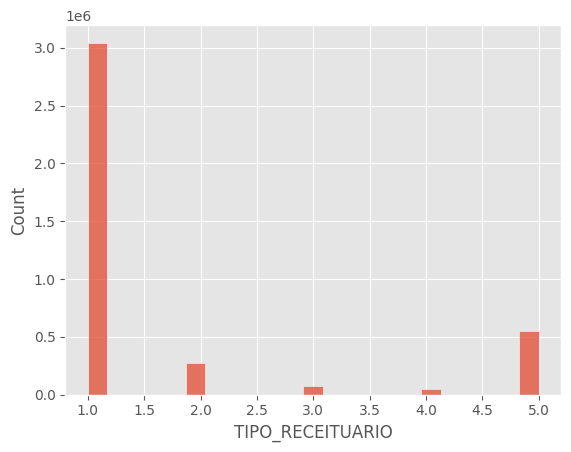

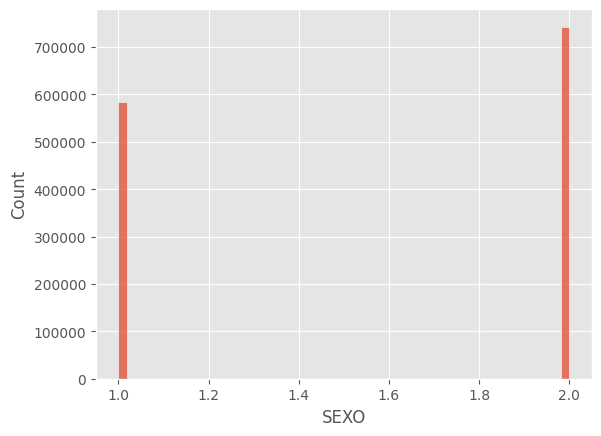

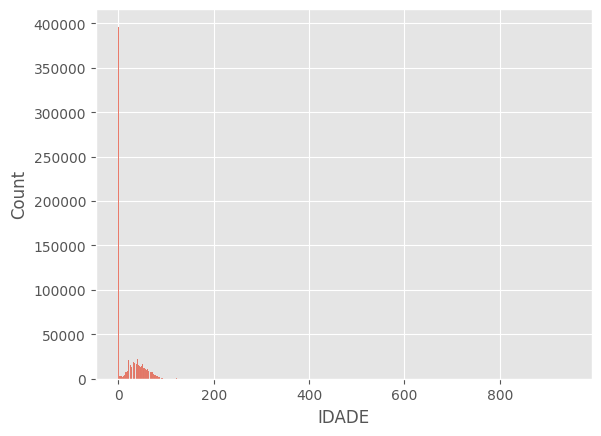

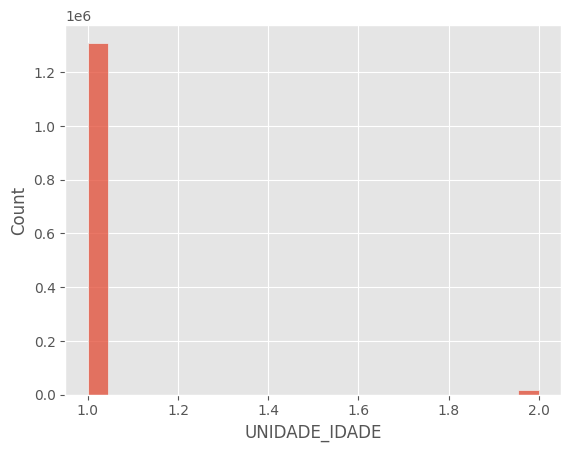

In [ ]:
#Histograma para a distribuição 2021
import warnings
warnings.filterwarnings('ignore')

for i in df_2021.select_dtypes(include='number').columns:
    sns.histplot(data=df_2021, x=i)
    plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')


**3.3. Box plots 2019**

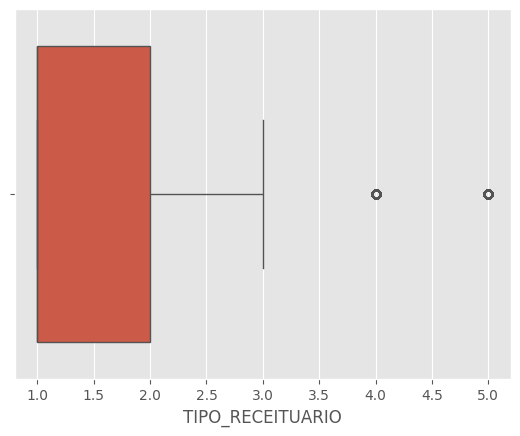

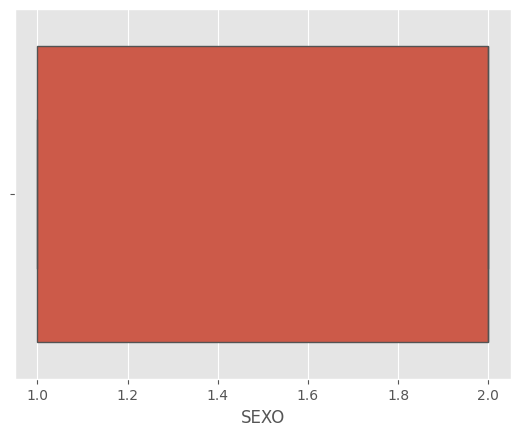

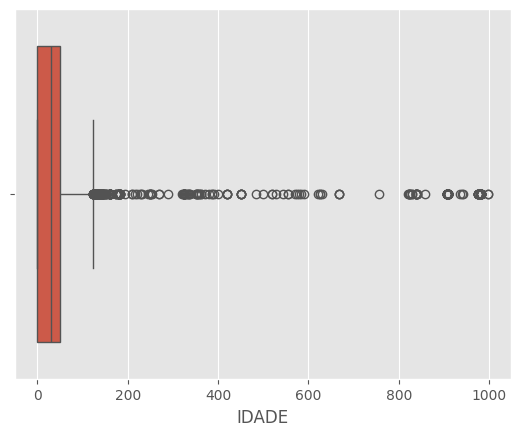

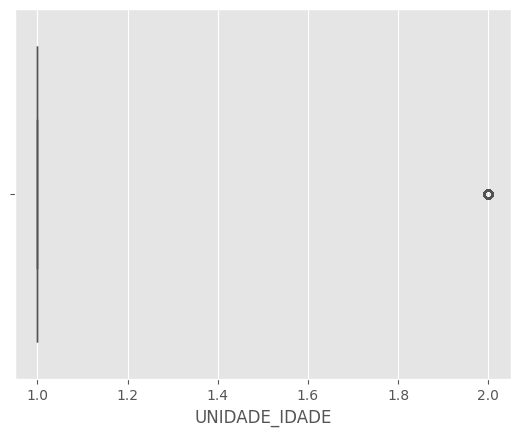

In [ ]:
for i in df_2019.select_dtypes(include='number').columns:
    sns.boxplot(data=df_2019, x=i)
    plt.show()

**3.4. Box plots 2021**

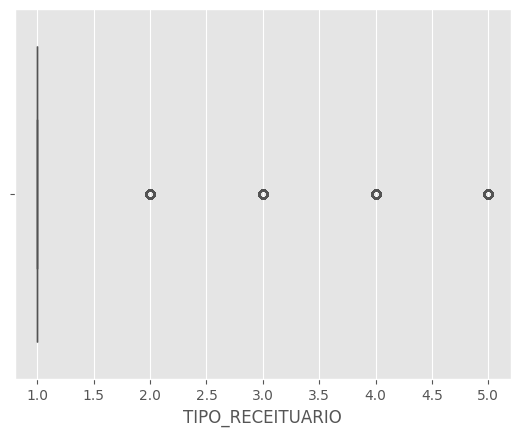

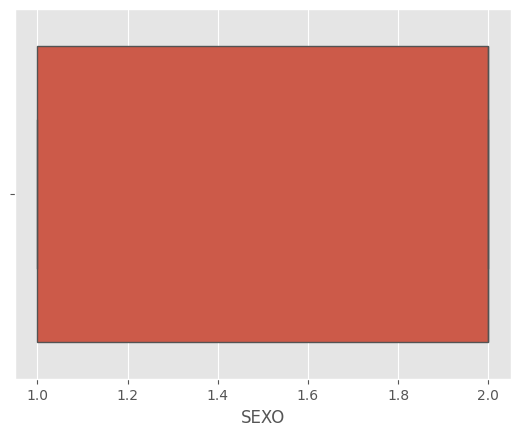

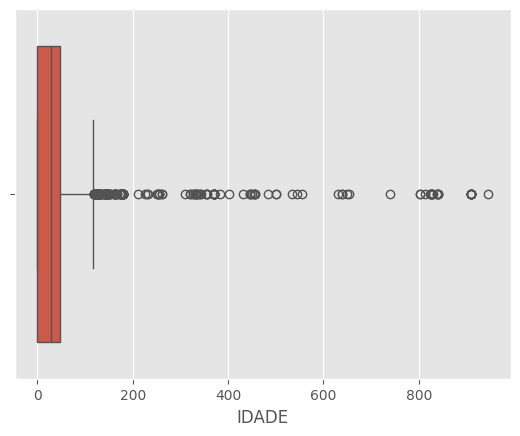

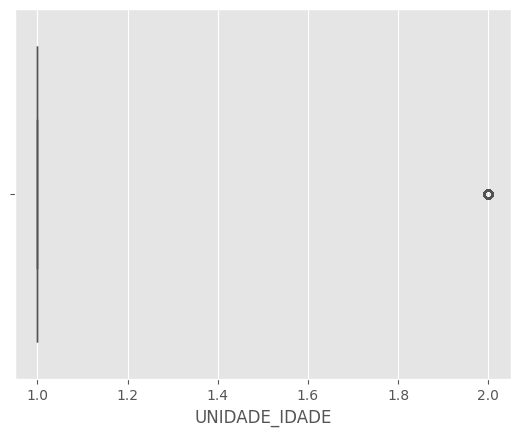

In [ ]:

for i in df_2021.select_dtypes(include='number').columns:
    sns.boxplot(data=df_2021, x=i)
    plt.show()

**3.5. Missing Value**

In [ ]:
#valores ausentes 2019
df_2019.isnull().sum()


,0
UF_VENDA,0
MUNICIPIO_VENDA,0
PRINCIPIO_ATIVO,0
QTD_ATIVO_POR_UNID_FARMACOTEC,0
UNIDADE_MEDIDA_PRINCIPIO_ATIVO,0
QTD_UNIDADE_FARMACOTECNICA,0
TIPO_UNIDADE_FARMACOTECNICA,0
TIPO_RECEITUARIO,0
SEXO,2635674
IDADE,2635674


In [ ]:
#valores ausentes 2021
df_2021.isnull().sum()

,0
UF_VENDA,0
MUNICIPIO_VENDA,0
PRINCIPIO_ATIVO,0
QTD_ATIVO_POR_UNID_FARMACOTEC,0
UNIDADE_MEDIDA_PRINCIPIO_ATIVO,0
QTD_UNIDADE_FARMACOTECNICA,0
TIPO_UNIDADE_FARMACOTECNICA,0
TIPO_RECEITUARIO,0
SEXO,2659121
IDADE,2659121


In [ ]:
#Substituindo valores nulos (ausentes) nas colunas 'SEXO','IDADE','UNIDADE_IDADE' pela mediana de cada coluna
colunas = ['SEXO','IDADE','UNIDADE_IDADE']
for col in colunas:
   df_2019[col] = df_2019[col].fillna(df_2019[col].median())

In [ ]:
#Substituindo valores nulos (ausentes) nas colunas 'SEXO','IDADE','UNIDADE_IDADE' pela mediana de cada coluna
colunas = ['SEXO','IDADE','UNIDADE_IDADE']
for col in colunas:
   df_2021[col] = df_2021[col].fillna(df_2021[col].median())

In [ ]:
#importação do SimpleImputer
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='mean')

In [ ]:
#Iternando apenas nas colunas numércas e realiza imputação por coluna, preenchendo valores nulos coma a media

for i in df_2019.select_dtypes(include='number').columns:
    df_2019[i] = impute.fit_transform(df_2019[[i]])

for i in df_2021.select_dtypes(include='number').columns:
    df_2021[i] = impute.fit_transform(df_2021[[i]])


**3.6. Tratar Outliers**

In [ ]:
#tratando Outliers de 2019
df_2019.select_dtypes(include=['number'])

,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
0,1.0,2.0,30.0,1.0
1,1.0,2.0,30.0,1.0
2,1.0,2.0,30.0,1.0
3,1.0,2.0,30.0,1.0
4,1.0,2.0,30.0,1.0
...,...,...,...,...
4132849,1.0,2.0,30.0,1.0
4132850,1.0,2.0,30.0,1.0
4132851,1.0,2.0,30.0,1.0
4132852,1.0,2.0,30.0,1.0


In [ ]:
#tratando Outliers de 2021
df_2021.select_dtypes(include=['number'])

,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
0,1.0,2.0,28.0,1.0
1,1.0,2.0,28.0,1.0
2,1.0,2.0,28.0,1.0
3,1.0,2.0,28.0,1.0
4,1.0,2.0,28.0,1.0
...,...,...,...,...
3985870,1.0,2.0,28.0,1.0
3985871,1.0,2.0,28.0,1.0
3985872,1.0,2.0,28.0,1.0
3985873,1.0,2.0,28.0,1.0


## **4. Análise Descritiva**

**4.1. Análise Univariada**

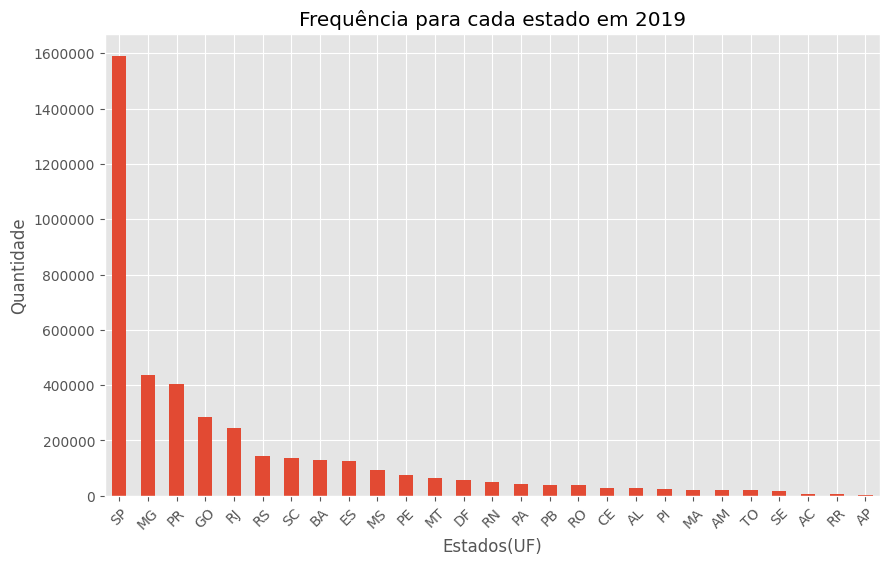

In [ ]:
#Frequência para cada estado
f1 = df_2019['UF_VENDA'].value_counts()

plt.figure(figsize=(10, 6))
f1.plot(kind='bar')
plt.title('Frequência para cada estado em 2019')
plt.xlabel('Estados(UF)')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

#Usando FuncFormatter para formatar o eixo Y como inteiro
formatter = FuncFormatter(lambda x, _: f'{int(x)}')  # Converte os valores para inteiros
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

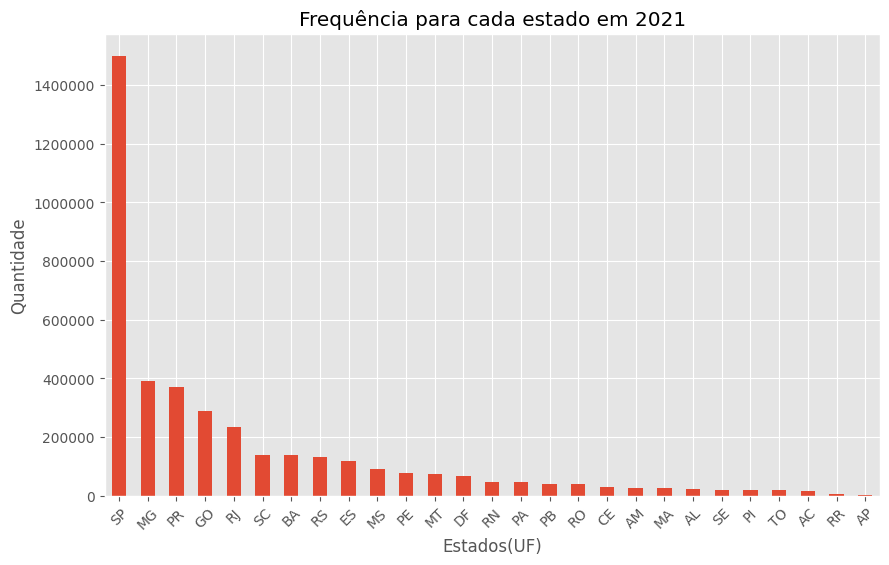

In [ ]:
#Frequência para cada estado
f1 = df_2021['UF_VENDA'].value_counts()

plt.figure(figsize=(10, 6))
f1.plot(kind='bar')
plt.title('Frequência para cada estado em 2021')
plt.xlabel('Estados(UF)')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

#Usando FuncFormatter para formatar o eixo Y como inteiro
formatter = FuncFormatter(lambda x, _: f'{int(x)}')  # Converte os valores para inteiros
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

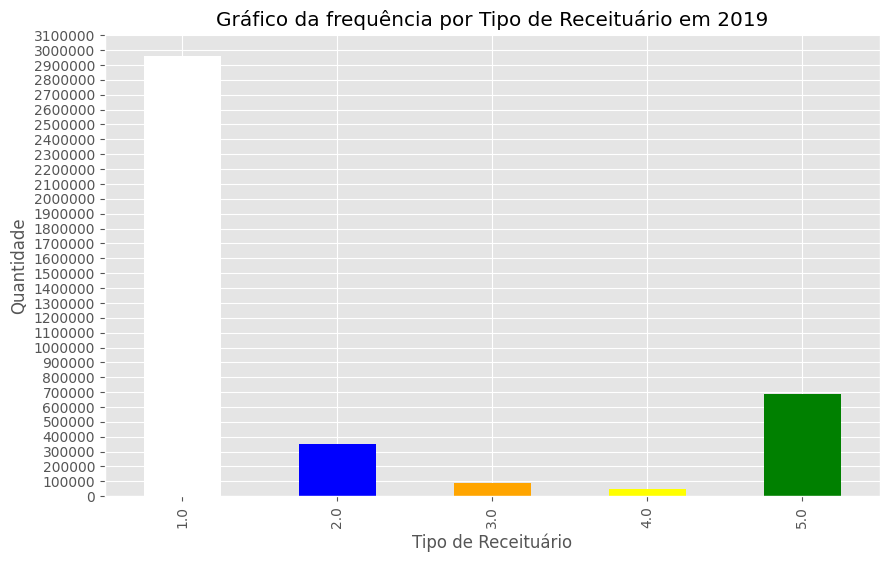

In [ ]:
# Tipo de Receituário (milhões)
f2 = df_2019['TIPO_RECEITUARIO'].value_counts().sort_index()

# Cores das barras
colors = ['#ffffff', 'blue', 'orange', 'yellow', 'green']

plt.figure(figsize=(10, 6))
f2.plot(kind='bar', color=colors)
plt.title('Gráfico da frequência por Tipo de Receituário em 2019')
plt.xlabel('Tipo de Receituário')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)

# Definindo um intervalo menor no eixo y
plt.gca().yaxis.set_major_locator(MultipleLocator(100000))

#Usando FuncFormatter para formatar o eixo Y como inteiro
formatter = FuncFormatter(lambda x, _: f'{int(x)}')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


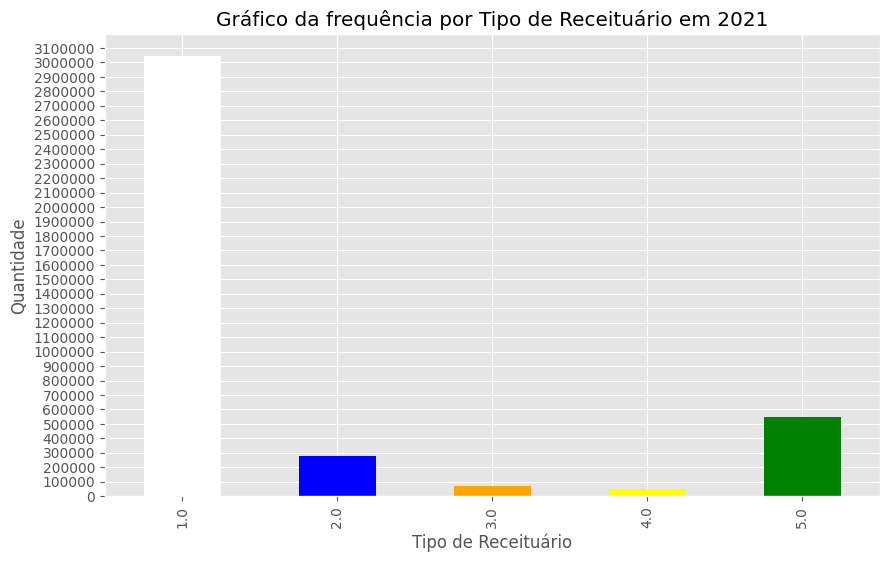

In [ ]:
# Tipo de Receituário (milhões)
f2 = df_2021['TIPO_RECEITUARIO'].value_counts().sort_index()

# Cores das barras
colors = ['#ffffff', 'blue', 'orange', 'yellow', 'green']

plt.figure(figsize=(10, 6))
f2.plot(kind='bar', color=colors)
plt.title('Gráfico da frequência por Tipo de Receituário em 2021')
plt.xlabel('Tipo de Receituário')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)

# Definindo um intervalo menor no eixo y
plt.gca().yaxis.set_major_locator(MultipleLocator(100000))

#Usando FuncFormatter para formatar o eixo Y como inteiro
formatter = FuncFormatter(lambda x, _: f'{int(x)}')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


Tipo de receituário utilizado na prescrição.

1 – Receita de Controle Especial em 2 vias (Receita
Branca );

---
2 – Notificação de Receita B (**Notificação Azul** );


---
3 – Notificação de Receita Especial (Notificação
Branca **negrito** - Retinóicas de Uso sistêmico e Taliomida);


---

4 – Notificação de Receita A (**Notificação Amarela** - Entorpecentes e pscicotópricas);

---



5 – Receita Antimicrobiano em 2 vias.

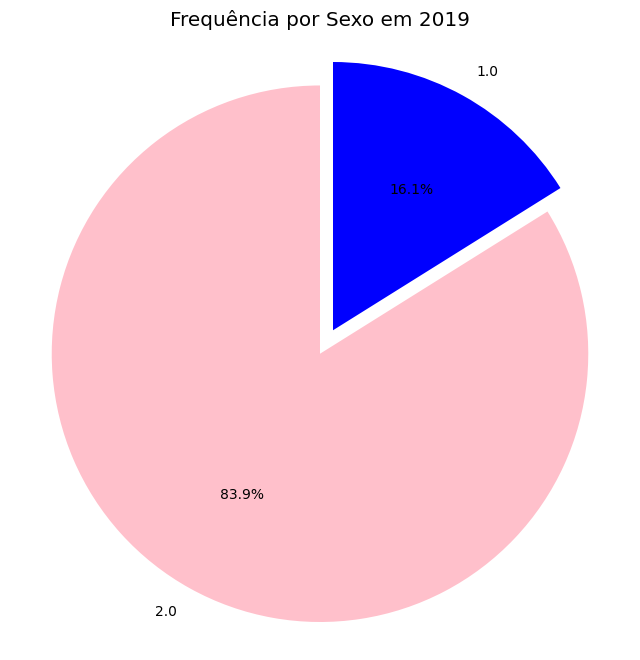

In [ ]:
# Frequência por sexo
f3 = df_2019['SEXO'].value_counts()

# Definindo cores específicas para masculino e feminino
cores = ['blue' if sexo == 1.0 else 'pink' for sexo in f3.index]

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(f3, labels=f3.index, colors=cores, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))  # explode para destacar uma fatia
plt.title('Frequência por Sexo em 2019')

# Mostrar o gráfico
plt.axis('equal')  # Para garantir que o gráfico seja circular
plt.show()


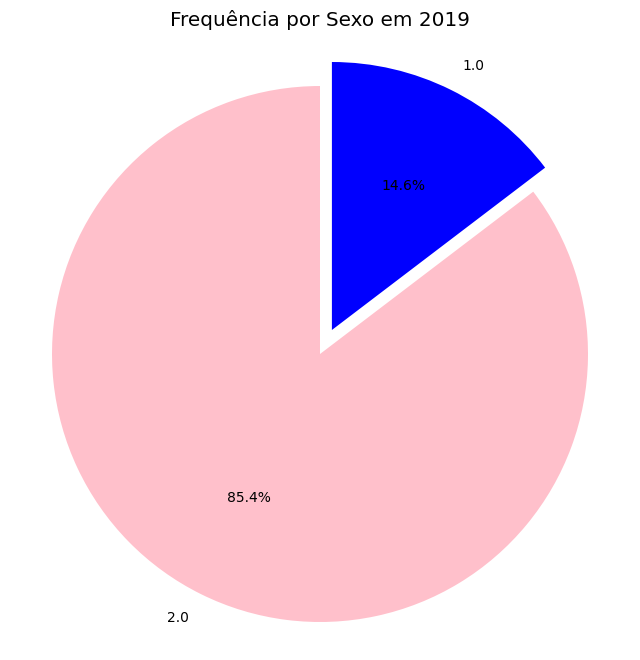

In [ ]:
# Frequência por sexo
f3 = df_2021['SEXO'].value_counts()

# Definindo cores específicas para masculino e feminino
cores = ['blue' if sexo == 1.0 else 'pink' for sexo in f3.index]

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(f3, labels=f3.index, colors=cores, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))  # explode para destacar uma fatia
plt.title('Frequência por Sexo em 2019')

# Mostrar o gráfico
plt.axis('equal')  # Para garantir que o gráfico seja circular
plt.show()


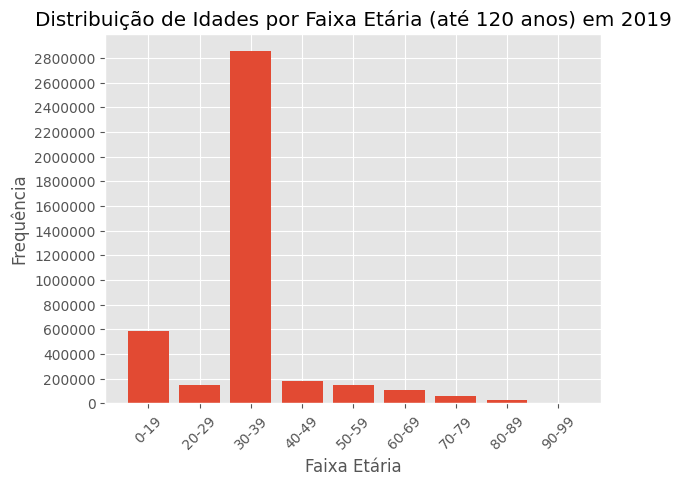

In [ ]:
# Filtrar para idades até 120 em 2019
df_2019 = df_2019[df_2019['IDADE'] <= 120]

# Definir faixas etárias
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Criar uma coluna de faixas etárias
df_2019['faixa_etaria'] = pd.cut(df_2019['IDADE'], bins=bins, labels=labels, right=False)

# Contar a frequência de cada faixa etária
faixa_counts = df_2019['faixa_etaria'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(faixa_counts.index, faixa_counts.values)
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades por Faixa Etária (até 120 anos) em 2019')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Definindo um intervalo menor no eixo y
plt.gca().yaxis.set_major_locator(MultipleLocator(200000))

#Usando FuncFormatter para formatar o eixo Y como inteiro
formatter = FuncFormatter(lambda x, _: f'{int(x)}')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


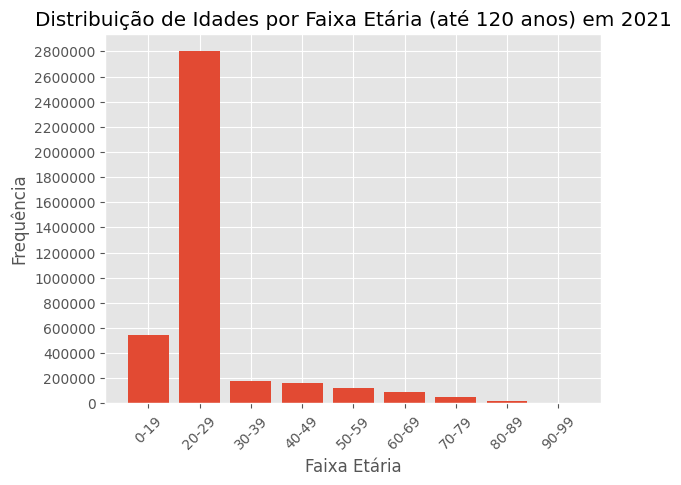

In [ ]:
# Filtrar para idades até 120 em 2019
df_2021 = df_2021[df_2021['IDADE'] <= 120]

# Definir faixas etárias
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Criar uma coluna de faixas etárias
df_2021['faixa_etaria'] = pd.cut(df_2021['IDADE'], bins=bins, labels=labels, right=False)

# Contar a frequência de cada faixa etária
faixa_counts = df_2021['faixa_etaria'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(faixa_counts.index, faixa_counts.values)
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades por Faixa Etária (até 120 anos) em 2021')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Definindo um intervalo menor no eixo y
plt.gca().yaxis.set_major_locator(MultipleLocator(200000))

#Usando FuncFormatter para formatar o eixo Y como inteiro
formatter = FuncFormatter(lambda x, _: f'{int(x)}')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


**4.2. Análise Bivariada**

In [ ]:
# Criando a coluna 'LOCAL' no dataframe em 2019
df_2019['LOCAL'] = df_2019['MUNICIPIO_VENDA'] + ' - ' + df_2019['UF_VENDA']

# Criando a coluna 'LOCAL' no dataframe em 2021
df_2021['LOCAL'] = df_2021['MUNICIPIO_VENDA'] + ' - ' + df_2021['UF_VENDA']

In [ ]:
# Criando a nova coluna chamada 'AMOSTRA_VENDA' no dataframe, concatenando os valores das colunas 'PRINCIPIO_ATIVO' e 'QTD_UNIDADE_FARMACOTECNICA'
df_2019['AMOSTRA_VENDA'] = df_2019['PRINCIPIO_ATIVO'].astype(str) + ' - ' + df_2019['QTD_UNIDADE_FARMACOTECNICA'].astype(str)
df_2021['AMOSTRA_VENDA'] = df_2021['PRINCIPIO_ATIVO'].astype(str) + ' - ' + df_2021['QTD_UNIDADE_FARMACOTECNICA'].astype(str)


In [ ]:
# Criando a coluna 'AMOSTRA_COM_LOCAL' no dataframe, concatenando 'AMOSTRA_VENDA' e 'LOCAL'
df_2019['AMOSTRA_COM_LOCAL'] = df_2019['AMOSTRA_VENDA'].astype(str) + ' - ' + df_2019['LOCAL'].astype(str)
df_2021['AMOSTRA_COM_LOCAL'] = df_2021['AMOSTRA_VENDA'].astype(str) + ' - ' + df_2021['LOCAL'].astype(str)


In [ ]:
# Função para filtrar os 10 produtos mais vendidos por coluna (para 2019)
print("Filtro 2019")
def filtrar_top_10_frequencias_2019(df_2019, coluna):
    frequencias = df_2019[coluna].value_counts()
    top_10_valores = frequencias.nlargest(10).index
    df_2019_filtrado = df_2019[df_2019[coluna].isin(top_10_valores)]
    return df_2019_filtrado

# Função para filtrar os 10 produtos mais vendidos por coluna (para 2021)
print("Filtro 2021")
def filtrar_top_10_frequencias_2021(df_2021, coluna):
    frequencias = df_2021[coluna].value_counts()
    top_10_valores = frequencias.nlargest(10).index
    df_2021_filtrado = df_2021[df_2021[coluna].isin(top_10_valores)]
    return df_2021_filtrado

Filtro 2019
Filtro 2021


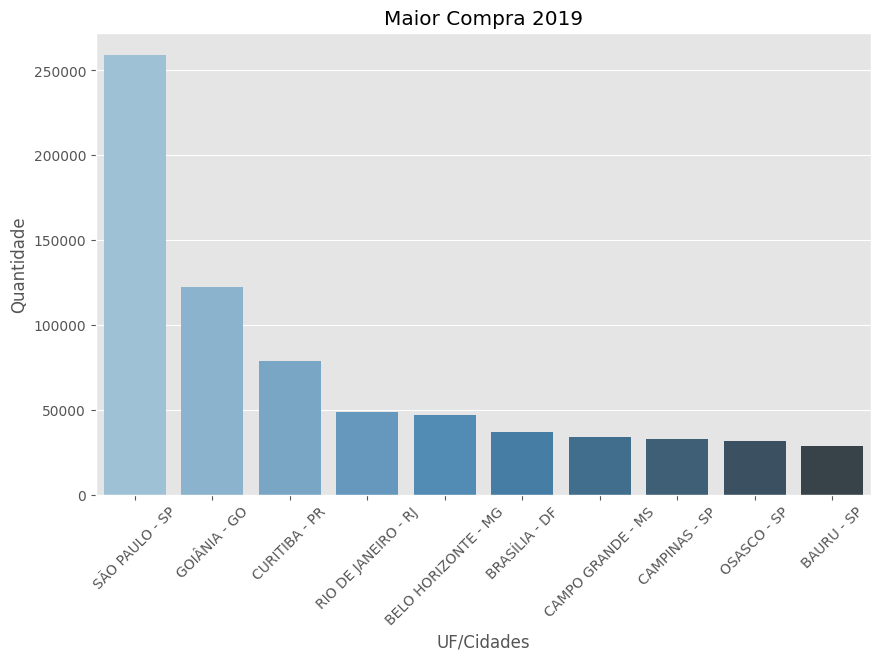

In [ ]:
# Filtrando os dados relevantes de 2019
df_2019_filtrado = filtrar_top_10_frequencias_2019(df_2019, 'LOCAL')

# Contar as frequências dos locais filtrados
frequencias_filtradas = df_2019_filtrado['LOCAL'].value_counts().reset_index()
frequencias_filtradas.columns = ['Produto', 'Frequência']

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Frequência', data=frequencias_filtradas, palette='Blues_d')
plt.title('Maior Compra 2019')
plt.xlabel('UF/Cidades')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

plt.show()

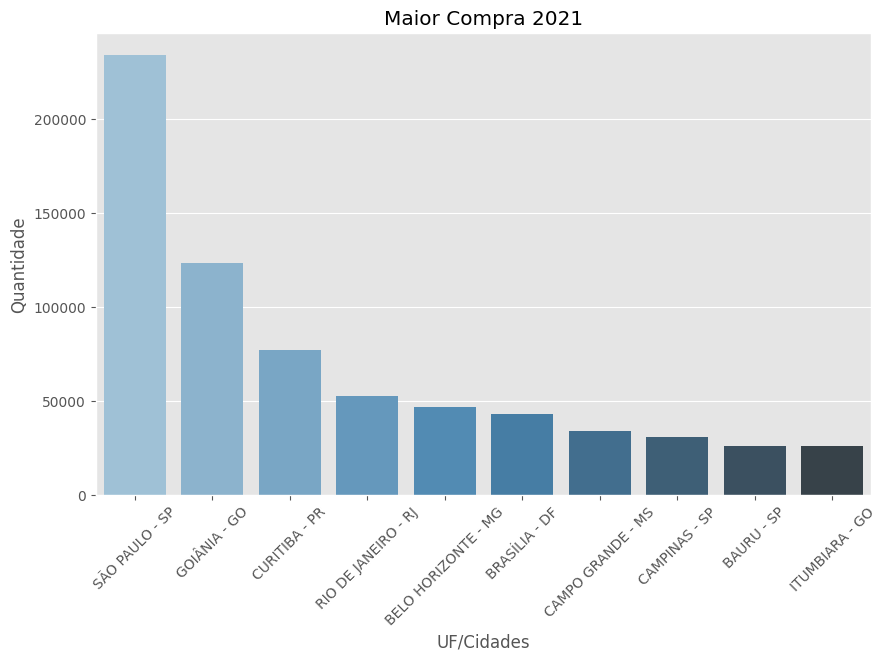

In [ ]:
# Filtrando os dados relevantes de 2021
df_2021_filtrado = filtrar_top_10_frequencias_2021(df_2021, 'LOCAL')

# Contar as frequências dos locais filtrados
frequencias_filtradas = df_2021_filtrado['LOCAL'].value_counts().reset_index()
frequencias_filtradas.columns = ['Produto', 'Frequência']

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Frequência', data=frequencias_filtradas, palette='Blues_d')
plt.title('Maior Compra 2021')
plt.xlabel('UF/Cidades')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

plt.show()


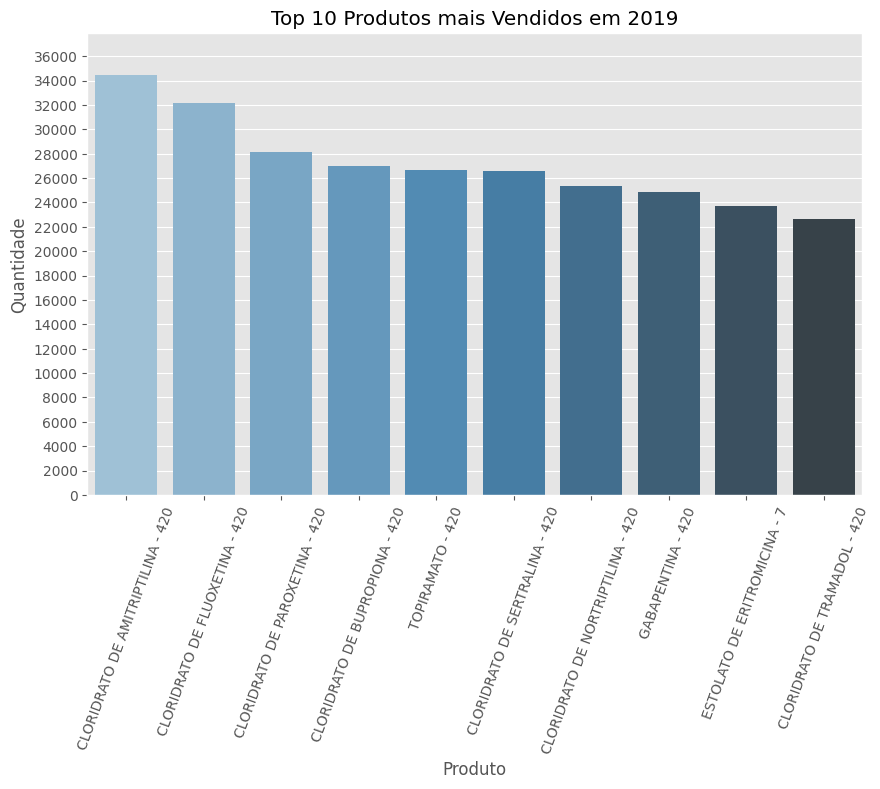

In [ ]:
# Filtrar os dados de 2019 para as amostras mais vendidas
df_2019_filtrado = filtrar_top_10_frequencias_2019(df_2019, 'AMOSTRA_VENDA')

# Contar as frequências dos produtos filtrados para 2019
frequencias_2019_filtradas = df_2019_filtrado['AMOSTRA_VENDA'].value_counts().reset_index()
frequencias_2019_filtradas.columns = ['Produto', 'Quantidade']

# Plotar o gráfico de barras para 2019
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Quantidade', data=frequencias_2019_filtradas, palette='Blues_d')
plt.title('Top 10 Produtos mais Vendidos em 2019')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=70)

# Ajustar o limite do eixo y para o gráfico de 2019
max_2019 = int(frequencias_2019_filtradas['Quantidade'].max())
plt.ylim(0, max_2019 * 1.1)  # Ajusta o limite superior com base no máximo de 2019
plt.yticks(range(0, max_2019 + 2000, 2000))  # Ticks de 2.000 em 2.000

plt.show()


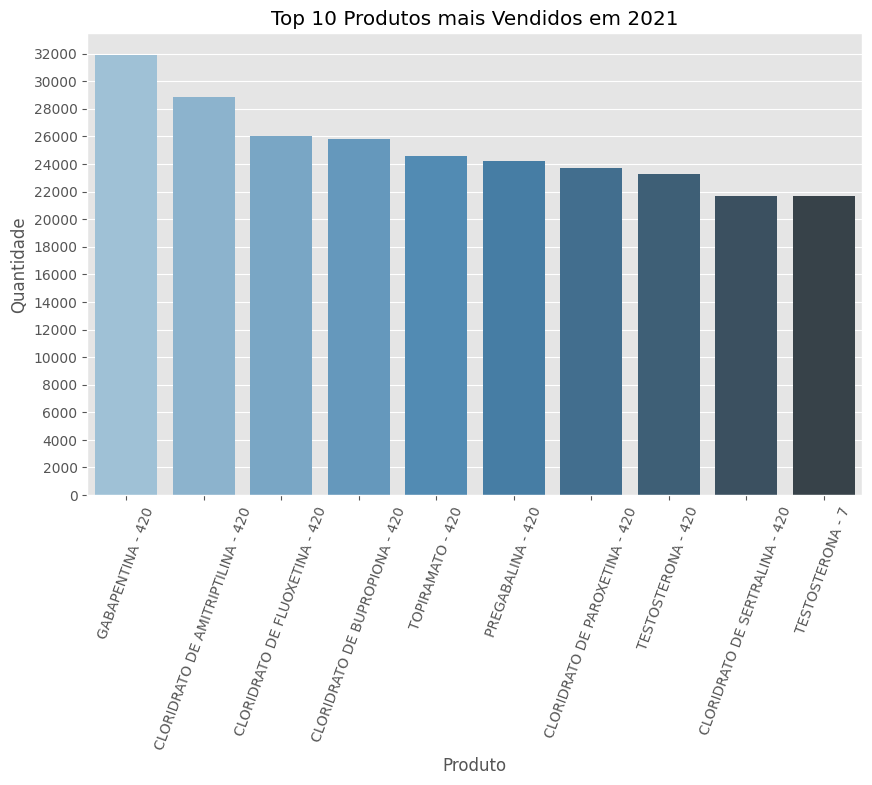

In [ ]:
# Filtrar os dados de 2021 para as amostras mais vendidas
df_2021_filtrado = filtrar_top_10_frequencias_2021(df_2021, 'AMOSTRA_VENDA')

# Contar as frequências dos produtos filtrados para 2021
frequencias_2021_filtradas = df_2021_filtrado['AMOSTRA_VENDA'].value_counts().reset_index()
frequencias_2021_filtradas.columns = ['Produto', 'Quantidade']

# Plotar o gráfico de barras para 2021
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Quantidade', data=frequencias_2021_filtradas, palette='Blues_d')
plt.title('Top 10 Produtos mais Vendidos em 2021')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=70)

# Ajustar o limite do eixo y para o gráfico de 2021
max_2021 = int(frequencias_2021_filtradas['Quantidade'].max())
plt.ylim(0, max_2021 * 1.05)  # Ajusta o limite superior com base no máximo de 2021
plt.yticks(range(0, max_2021 + 2000, 2000))  # Ticks de 2.000 em 2.000

plt.show()


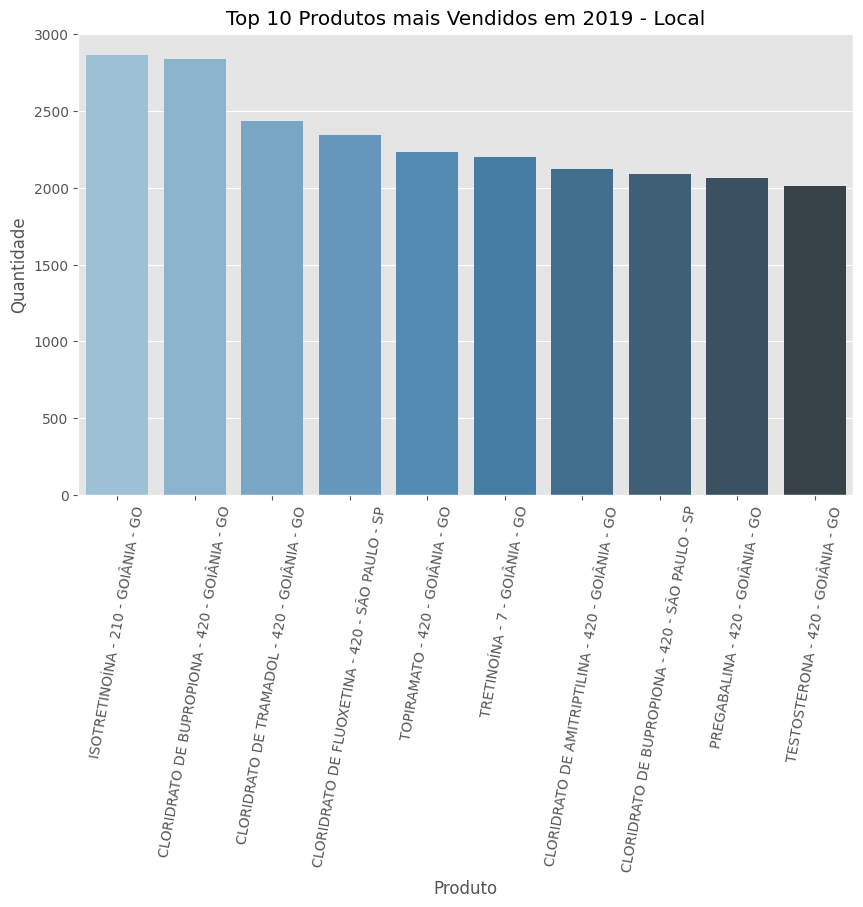

Tabela de 'AMOSTRAS COM LOCAL' - 2021


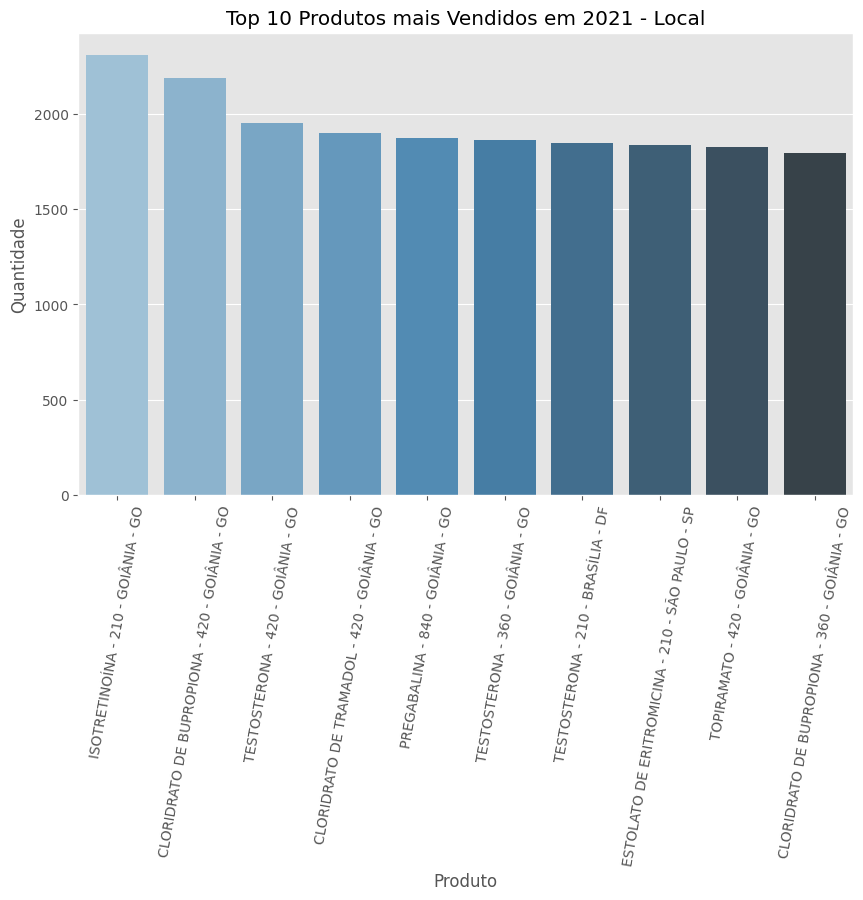

In [ ]:
# Tabela de "AMOSTRAS COM LOCAL" 2019
df_2019_filtrado = filtrar_top_10_frequencias_2019(df_2019, 'AMOSTRA_COM_LOCAL')

# Contar as frequências dos produtos filtrados
frequencias_filtradas_2019 = df_2019_filtrado['AMOSTRA_COM_LOCAL'].value_counts().reset_index()
frequencias_filtradas_2019.columns = ['Produto', 'Quantidade']

# Plotar o gráfico de barras para 2019
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Quantidade', data=frequencias_filtradas_2019, palette='Blues_d')
plt.title('Top 10 Produtos mais Vendidos em 2019 - Local')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=80)
plt.show()

# Tabela de "AMOSTRAS COM LOCAL" 2021
print("Tabela de 'AMOSTRAS COM LOCAL' - 2021")
df_2021_filtrado = filtrar_top_10_frequencias_2021(df_2021, 'AMOSTRA_COM_LOCAL')

# Contar as frequências dos produtos filtrados
frequencias_filtradas_2021 = df_2021_filtrado['AMOSTRA_COM_LOCAL'].value_counts().reset_index()
frequencias_filtradas_2021.columns = ['Produto', 'Quantidade']

# Plotar o gráfico de barras para 2021
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Quantidade', data=frequencias_filtradas_2021, palette='Blues_d')
plt.title('Top 10 Produtos mais Vendidos em 2021 - Local')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=80)
plt.show()

**4.3. Análise Multivariada**

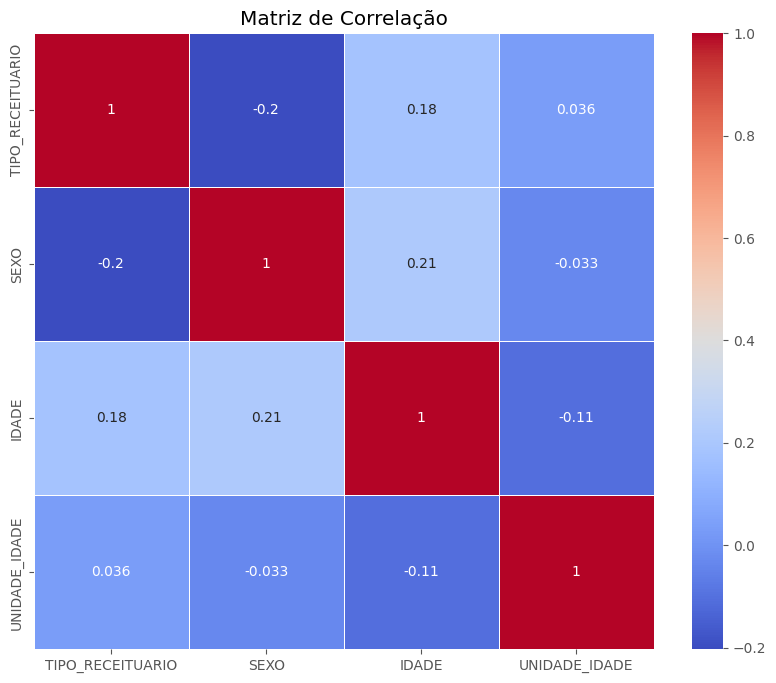

In [ ]:
# MAPA DE CALOR 2019
colunas_numericas = df_2019.select_dtypes(include=['float64', 'int64'])

correlacao = colunas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

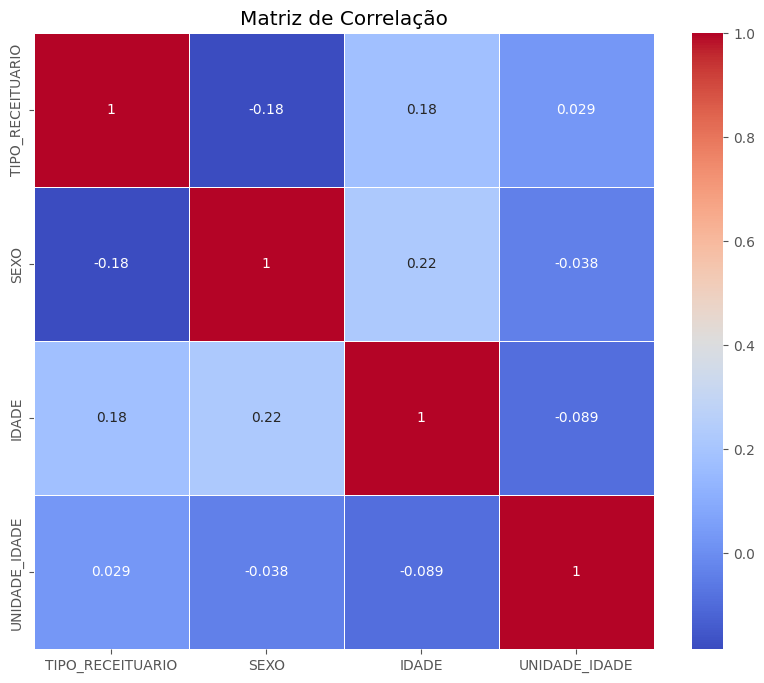

In [ ]:
# MAPA DE CALOR 2021
colunas_numericas = df_2021.select_dtypes(include=['float64', 'int64'])

correlacao = colunas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

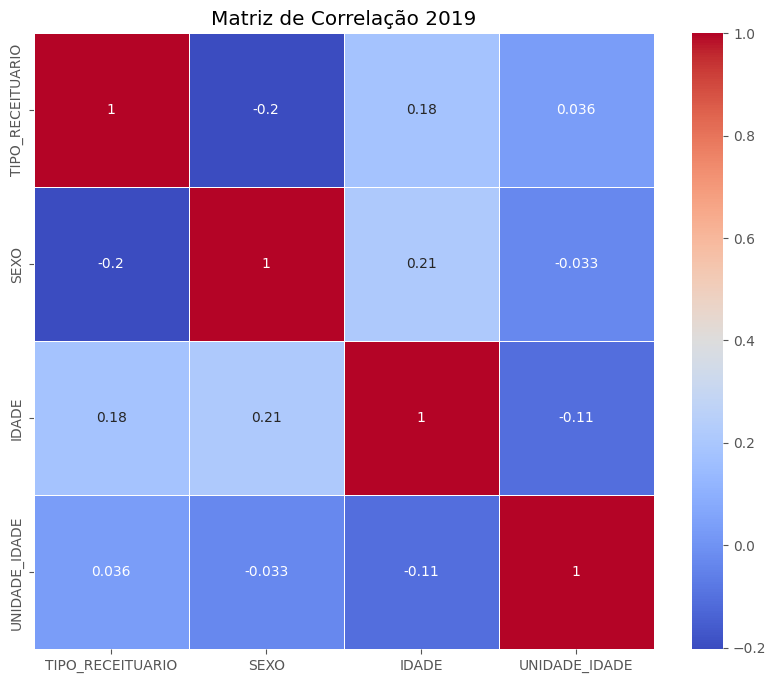

In [ ]:
# MAPA DE CALOR 2019
colunas_numericas = df_2019.select_dtypes(include=['float64', 'int64'])

correlacao = colunas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação 2019")
plt.show()

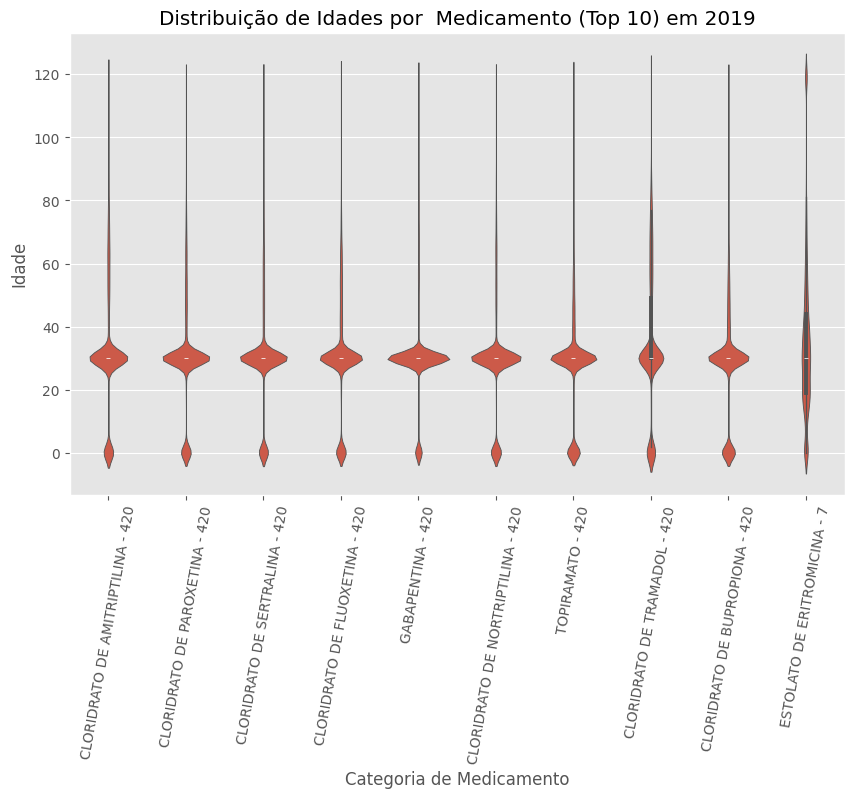

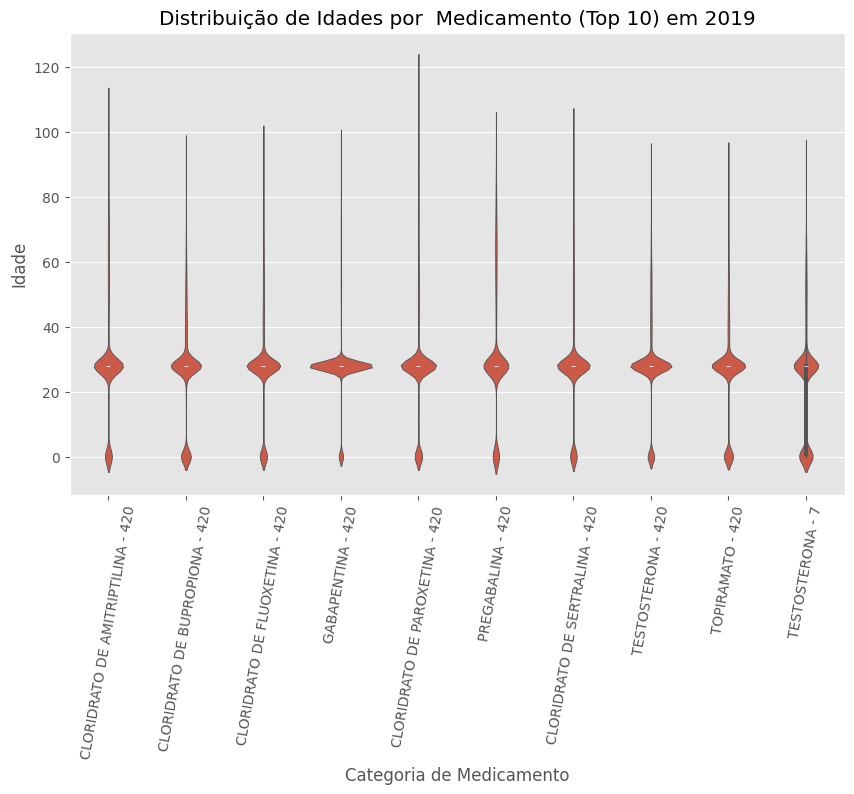

In [ ]:
# Filtrar os top 10 da coluna 'AMOSTRA_VENDA' 2019
top_10_amostras = df_2019['AMOSTRA_VENDA'].value_counts().nlargest(10).index

# Filtrar o DataFrame com as 10 principais categorias
df_2019_top_10 = df_2019[df_2019['AMOSTRA_VENDA'].isin(top_10_amostras)]

# Criar o Violin Plot para os top 10
plt.figure(figsize=(10, 6))
sns.violinplot(x='AMOSTRA_VENDA', y='IDADE', data=df_2019_top_10)

# Personalizar o gráfico
plt.title("Distribuição de Idades por  Medicamento (Top 10) em 2019")
plt.xlabel("Categoria de Medicamento")
plt.ylabel("Idade")
plt.xticks(rotation=80)  # Rotacionar os rótulos no eixo X se necessário
plt.show()


# Filtrar os top 10 da coluna 'AMOSTRA_VENDA' 2021
top_10_amostras = df_2021['AMOSTRA_VENDA'].value_counts().nlargest(10).index

# Filtrar o DataFrame com as 10 principais categorias
df_2021_top_10 = df_2021[df_2021['AMOSTRA_VENDA'].isin(top_10_amostras)]

# Criar o Violin Plot para os top 10
plt.figure(figsize=(10, 6))
sns.violinplot(x='AMOSTRA_VENDA', y='IDADE', data=df_2021_top_10)

# Personalizar o gráfico
plt.title("Distribuição de Idades por  Medicamento (Top 10) em 2019")
plt.xlabel("Categoria de Medicamento")
plt.ylabel("Idade")
plt.xticks(rotation=80)  # Rotacionar os rótulos no eixo X se necessário
plt.show()

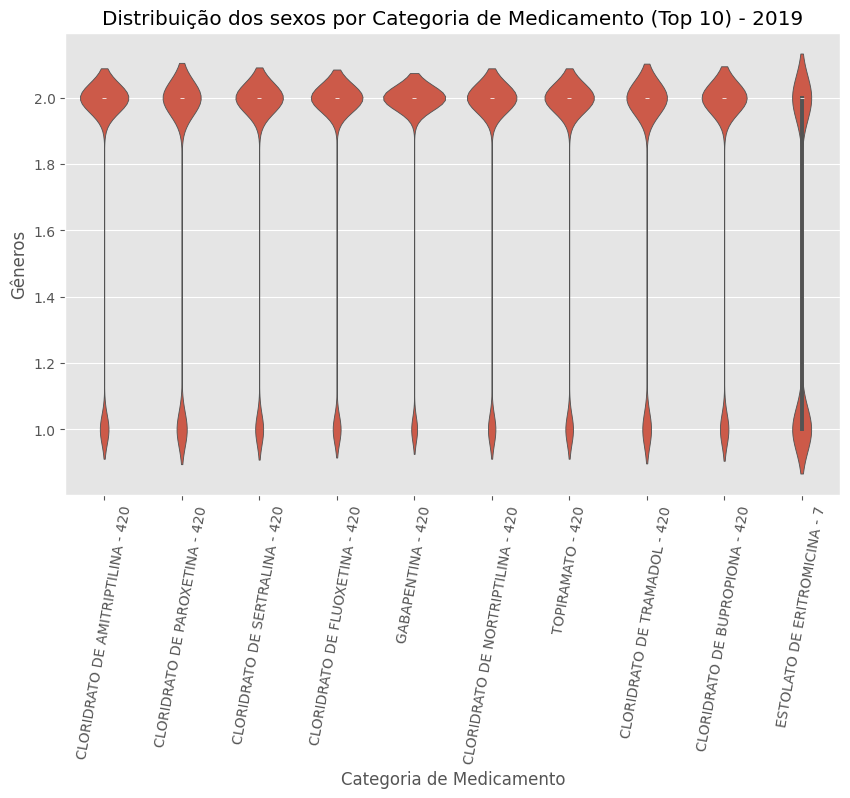

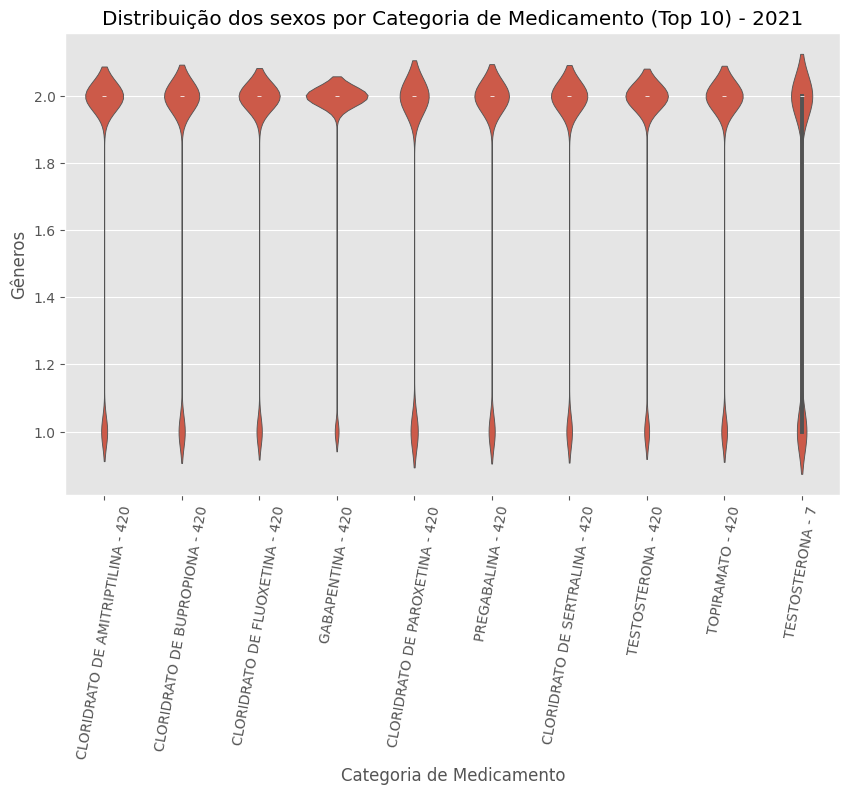

In [ ]:

# Para o ano de 2019
top_10_amostras_2019 = df_2019['AMOSTRA_VENDA'].value_counts().nlargest(10).index

# Filtrar o DataFrame com as 10 principais categorias
df_top_10_2019 = df_2019[df_2019['AMOSTRA_VENDA'].isin(top_10_amostras_2019)]

# Criar o Violin Plot para os top 10 de 2019
plt.figure(figsize=(10, 6))
sns.violinplot(x='AMOSTRA_VENDA', y='SEXO', data=df_top_10_2019)

# Personalizar o gráfico
plt.title("Distribuição dos sexos por Categoria de Medicamento (Top 10) - 2019")
plt.xlabel("Categoria de Medicamento")
plt.ylabel("Gêneros")
plt.xticks(rotation=80)  # Rotacionar os rótulos no eixo X se necessário
plt.show()

# Para o ano de 2021
# Filtrar os top 10 da coluna 'AMOSTRA_VENDA' para 2021
top_10_amostras_2021 = df_2021['AMOSTRA_VENDA'].value_counts().nlargest(10).index

# Filtrar o DataFrame com as 10 principais categorias
df_top_10_2021 = df_2021[df_2021['AMOSTRA_VENDA'].isin(top_10_amostras_2021)]

# Criar o Violin Plot para os top 10 de 2021
plt.figure(figsize=(10, 6))
sns.violinplot(x='AMOSTRA_VENDA', y='SEXO', data=df_top_10_2021)

# Personalizar o gráfico
plt.title("Distribuição dos sexos por Categoria de Medicamento (Top 10) - 2021")
plt.xlabel("Categoria de Medicamento")
plt.ylabel("Gêneros")
plt.xticks(rotation=80)  # Rotacionar os rótulos no eixo X se necessário
plt.show()

**Medicamentos Controlados: Tipo 1 (Receita Branca), Tipo 2 (Notificação Azul) e Tipo 5 (Antimicrobianos em 2 vias) - 2019 e 2021**



                          2019          2021
TIPO_RECEITUARIO                            
1.0               4.228459e+09  4.254462e+09
2.0               5.433227e+08  4.313963e+08
5.0               2.474988e+08  2.061551e+08


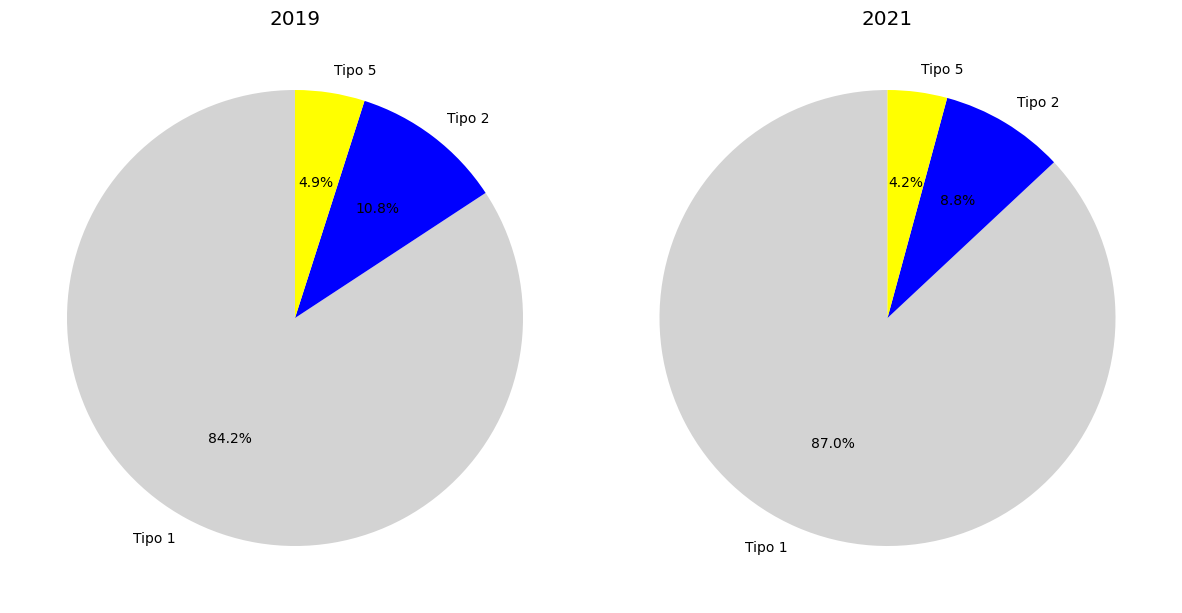

In [ ]:
# Convertendo a coluna 'QTD_UNIDADE_FARMACOTECNICA' para numérica, forçando valores não numéricos a se tornarem NaN
df_2019['QTD_UNIDADE_FARMACOTECNICA'] = pd.to_numeric(df_2019['QTD_UNIDADE_FARMACOTECNICA'], errors='coerce')
df_2021['QTD_UNIDADE_FARMACOTECNICA'] = pd.to_numeric(df_2021['QTD_UNIDADE_FARMACOTECNICA'], errors='coerce')

# Substituir NaN por zero, caso haja valores ausentes
df_2019['QTD_UNIDADE_FARMACOTECNICA'] = df_2019['QTD_UNIDADE_FARMACOTECNICA'].fillna(0)
df_2021['QTD_UNIDADE_FARMACOTECNICA'] = df_2021['QTD_UNIDADE_FARMACOTECNICA'].fillna(0)

# Agrupar por TIPO_RECEITUARIO e somar a quantidade de medicamentos para 2019 e 2021
df_2019_tipo = df_2019.groupby('TIPO_RECEITUARIO')['QTD_UNIDADE_FARMACOTECNICA'].sum()
df_2021_tipo = df_2021.groupby('TIPO_RECEITUARIO')['QTD_UNIDADE_FARMACOTECNICA'].sum()

# Criar a tabela com os dados
data = {'2019': df_2019_tipo, '2021': df_2021_tipo}
tabela_remedios = pd.DataFrame(data)

# Selecionar apenas os tipos 1, 2 e 5
tabela_remedios = tabela_remedios.loc[[1, 2, 5]]

print(tabela_remedios)

# Criar os gráficos de pizza para 2019 e 2021
labels = ['Tipo 1', 'Tipo 2', 'Tipo 5']
colors_2019 = ['lightgray', 'blue', 'yellow']
colors_2021 = ['lightgray', 'blue', 'yellow']

# Criando os gráficos lado a lado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(df_2019_tipo.loc[[1, 2, 5]], labels=labels, colors=colors_2019, autopct='%1.1f%%', startangle=90)
plt.title('2019')

plt.subplot(1, 2, 2)
plt.pie(df_2021_tipo.loc[[1, 2, 5]], labels=labels, colors=colors_2021, autopct='%1.1f%%', startangle=90)
plt.title('2021')

# Ajustar a disposição
plt.subplots_adjust(wspace=0.5)  # Ajuste o valor conforme necessário
plt.tight_layout()
plt.show()


In [ ]:
''''

# Lista de medicamentos considerados ansiolíticos ou antidepressivos
minha_lista2 = [
    "Oxalato de Escitalopram", "Cloridrato de Fluoxetina", "Cloridrato de Imipramina",
    "Cloridrato de Nortriptilina", "Pregabalina", "Hemifumarato de Quetiapina",
    "Risperidona", "Cloridrato de Sertralina", "Cloridrato de Paroxetina Hemi-hidratado",
    "Alprazolam", "Bromazepam", "Clonazepam", "Clordiazepóxido", "Diazepam",
    "Cloridrato de Doxepina", "Duloxetina", "Cloridrato de Duloxetina", "Fluvoxamina",
    "Imipramina", "Mirtazapina", "Cloridrato de Paroxetina", "Cloridrato de Trazodona",
    "Cloridrato de Venlafaxina", "Hemitartarato de Zolpidem", "Cloxazolam", "Sulpirida",
    "Venlafaxina", "Cloridrato de Buspirona", "Citalopram", "Cloridrato de Clorpromazina",
    "Lorazepam", "Paroxetina", "Quetiapina", "Sertralina", "Doxepina", "Amitriptilina",
    "Clomipramina", "Zolpidem", "Escitalopram", "Fluoxetina", "Cloridrato de Citalopram",
    "Clobazam", "Buspirona", "Fluvoxamina", "Nortriptilina", "Trazodona", "Desvenlafaxina",
    "Cloridrato de Clordiazepóxido", "Agomelatina", "Clorpromazina", "Maleato de Midazolam",
    "Cloridrato de Clordiazepóxido", "Valproato de Sódio", "Decanoato de Flufenazina", "Fenobarbital",
    "Embonato de Imipramina", "Cloridrato de Levomepromazina", "Cloridrato de Midazolam", "Azepexol",
    "Bromidrato de Vortioxetina", "Ácido Valpróico", "Acamprosato", "Zopiclona", "Acetato de Paroxetina",
    "Sulfato de Tranilcipromina", "Levomepromazina", "Embónato de Olanzapina Monoidratado",
    "Cloridrato de Noxiptilina", "Tranilcipromina", "Pizotifeno", "Cloridrato de Cloroperona",
    "Aripiprazol Monoidratado", "Estazolam", "Gabapentina Enacarbil", "Fenobarbital Sódico", "Midazolam",
    "Mesilato de Lorazepam", "Melatonina", "Embonato de Amitriptilina", "Brexpiprazol",
    "Cloridrato de Zolazepam", "Melperona", "Delorazepam", "Cidoxepina", "Embonato de Clorpromazina",
    "Malato de Pizotifeno", "Decanoato de Haloperidol", "Desidrocolato de Lítio", "Pentiapina",
    "Orotato de Lítio"
]

# Função para processar e filtrar os datasets
def processar_datasets(dataset_path):
    chunks = []
    # Lendo o arquivo em chunks
    for chunk in pd.read_csv(dataset_path, chunksize=10000):
        # Filtrando pelo tipo de receituário 1.0, 2.0 e 4.0
        chunk_filtrado = chunk[chunk['TIPO_RECEITUARIO'].isin([1.0, 2.0, 4.0])]

        # Normalizando os nomes dos princípios ativos para maiúsculas
        chunk_filtrado['PRINCIPIO_ATIVO'] = chunk_filtrado['PRINCIPIO_ATIVO'].str.upper().str.strip()

        # Filtrando os medicamentos presentes na lista
        chunk_filtrado = chunk_filtrado[chunk_filtrado['PRINCIPIO_ATIVO'].isin([med.upper() for med in minha_lista2])]

        # Adicionando o chunk processado à lista
        chunks.append(chunk_filtrado[['PRINCIPIO_ATIVO', 'TIPO_RECEITUARIO']])

    # Concatenando todos os chunks
    df_final = pd.concat(chunks, ignore_index=True)

    # Remover duplicados para garantir que cada princípio ativo ocorra apenas uma vez
    df_final = df_final.drop_duplicates(subset='PRINCIPIO_ATIVO')

    return df_final

# Processando os datasets de 2019 e 2021
df_2019_filtrado = processar_datasets(anvisa2019)
df_2021_filtrado = processar_datasets(anvisa2021)

# Concatenando os dois dataframes
df_resultado = pd.concat([df_2019_filtrado, df_2021_filtrado], ignore_index=True)

pd.set_option('display.max_rows', None)  # Exibir todas as linhas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas

# Exibindo o resultado final
print(df_resultado)

'''


'\'\n\n# Lista de medicamentos considerados ansiolíticos ou antidepressivos\nminha_lista2 = [\n    "Oxalato de Escitalopram", "Cloridrato de Fluoxetina", "Cloridrato de Imipramina",\n    "Cloridrato de Nortriptilina", "Pregabalina", "Hemifumarato de Quetiapina",\n    "Risperidona", "Cloridrato de Sertralina", "Cloridrato de Paroxetina Hemi-hidratado",\n    "Alprazolam", "Bromazepam", "Clonazepam", "Clordiazepóxido", "Diazepam",\n    "Cloridrato de Doxepina", "Duloxetina", "Cloridrato de Duloxetina", "Fluvoxamina",\n    "Imipramina", "Mirtazapina", "Cloridrato de Paroxetina", "Cloridrato de Trazodona",\n    "Cloridrato de Venlafaxina", "Hemitartarato de Zolpidem", "Cloxazolam", "Sulpirida",\n    "Venlafaxina", "Cloridrato de Buspirona", "Citalopram", "Cloridrato de Clorpromazina",\n    "Lorazepam", "Paroxetina", "Quetiapina", "Sertralina", "Doxepina", "Amitriptilina",\n    "Clomipramina", "Zolpidem", "Escitalopram", "Fluoxetina", "Cloridrato de Citalopram",\n    "Clobazam", "Buspirona",

##**5. Resultados dos Datasets**

**Dataset Anvisa-2019**

- O tratamento de Outliers não precisou ser usado, pois a maioria dos valores pareciam veridicos, porém ao analisarmos a distribuição com um gráfico Boxplot a coluna "IDADE" parecia ter alguns valores inconsistentes.

**Análise Univariada:**

- Gráfico com a frequência de vendas em cada estado(UF) do Brasil - (SP, MG, PR, GO, ES).
- Gráfico de tipos de receitas mais usadas - (1, 2, 4), tendo um discreto crescimento no ano de 2021.
- Gráfico do Sexo do paciente para quem o medicamento era
destinado (antimicrobianos) - (3-4x mais o sexo feminino).
- Gráfico da distribuição por Idade - (30-40 anos maiores vendas).

**Análise Bivariada**

- Criando a Coluna "LOCAL" somando as tabelas "UF_VENDA" e "MUNICIPIOS_VENDA" a maior demanda foi nos municípios - (Goiânia, São Paulo, Curitiba, Belo Horizonte).
- Criando a Coluna "AMOSTRAS_VENDA" somando as tabelas "PRINCIPIO_ATIVO" e "QTD_UNIDADE_FARMACOTECNICA" - (Gabapentina, Cloridrato de Amitriptilina, C. Fluoxetina e C.Bupropiona), a (quantidade de vendas chega em torno de 5000 para cada medicamento).
- Criando a Coluna "AMOSTRA_COM_LOCAL" mostrando qual UF-Municipio onde os principios ativos foram mais vendidos - (Isotretinoína-Goiania, Cloridrato de Burpropiona-Goiania e C.Tramadol-Goiania).

**Análise Multivariada**

- Criando um Heatmap das colunas que possuem dados numéricos
- Criando um gráfico que relaciona a amostras vendidas com as idade dos pacientes - (entre 30-40 anos de idade).
- Criando um gráfico mostrando que o sexo feminino predomina, e os principios ativos de medicamentos mais comprado para essas pacientes - (Cloridrato de Amitriptilina, C. Paroxetina, C. Sertralina).

**Dataset Anvisa-2021**

- O tratamento de Outliers não precisou ser usado, pois a maioria dos valores pareciam veridicos, porém ao analisarmos a distribuição com um gráfico Boxplot a coluna "IDADE" parecia ter alguns valores inconsistentes.  

**Análise Univariada:**

- Gráfico de Barras dos estados que mais ocorreu  venda - (SP, MG, GO, PR, RJ).
- Gráfico de tipos de receitas mais usadas - (tipo 1, 5 e 2).
- O gráfico do sexo dos pacientes para quem o medicamento era destinado - (3-4x mais o sexo feminino).
- Distribuição da idade dos pacientes - (20 a 30 anos)  (aplicável apenas a medicamentos antimicrobianos).

**Análise Bivariada**

-  Criando a Coluna "LOCAL" somando as tabelas "UF_VENDA" e "MUNICIPIOS_VENDA" a maior demanda foi nos municípios - (São Paulo, Goiania e Curitiba).
- Criando a Coluna "AMOSTRAS_VENDA" somando as tabelas "PRINCIPIO_ATIVO" e "QTD_UNIDADE_FARMACOTECNICA" - (Gabapentina, Cloridrato de Amitriptilina, C. Fluoxetina e C.Bupropiona), e a (quantidade de vendas chega entre 30.000 para cada medicamento).
-Criando a Coluna "AMOSTRA_COM_LOCAL" mostrando qual UF-Municipio onde os principios ativos foram mais vendidos - (C. de Bupropiona, Isotretinoína, Topiramato - Goiânia).

**Análise Multivariada**

- Criando um Heatmap das colunas que possuem dados numéricos
- Criando um gráfico que relaciona a amostras vendidas com as idade dos pacientes - (entre 20-40 anos de idade).
- Criando um gráfico mostrando que o sexo feminino predomina, e os principios ativos de medicamentos mais comprado para essas pacientes - (Gabapentina e Cloridrato de Amitriptilina).

##**6. Analisando os Dados**

**Vendas por Estado (UF)**

- Em 2019, os estados com maior volume de vendas foram São Paulo (SP), Minas Gerais (MG), Paraná (PR), Goiás (GO) e Espírito Santo (ES). São Paulo foi, de longe, o estado com o maior número de vendas, seguido por Minas Gerais e Paraná.

- Em 2021, a distribuição das vendas por estado permaneceu similar, com São Paulo (SP) liderando novamente, seguido de Minas Gerais (MG) e Goiás (GO). No entanto, observou-se um aumento nas vendas em Goiânia (GO) e Curitiba (PR), o que pode indicar um deslocamento da demanda para essas regiões, possivelmente devido à concentração de clínicas e hospitais especializados.

**Tipos de Receitas Mais Usadas**

- Em 2019, os tipos de receita mais utilizados foram os Tipos 1, 5 e 2. O Tipo 1, que pode representar medicamentos para tratamentos crônicos, liderou as vendas, seguido dos Tipos 5 e 2, que incluem tratamentos para doenças psicológicas e antibióticos.

- Em 2021, a distribuição das receitas manteve-se similar, com o Tipo 1 novamente liderando, seguido pelos Tipos 5 e 2. Contudo, observou-se um aumento nas receitas para tratamentos psicológicos, possivelmente impulsionado pelo aumento da demanda por medicamentos relacionados à saúde mental devido aos efeitos da pandemia de COVID-19.

**Distribuição por Sexo**

- Em 2019, foi observada uma predominância do sexo feminino nas vendas de medicamentos, especialmente nos antimicrobianos, com mulheres representando de 3 a 4 vezes mais que os homens.

- Em 2021, o perfil de consumo manteve-se consistente, com o sexo feminino liderando a demanda por medicamentos, especialmente para tratamentos de doenças psicológicas, como antidepressivos (ex.: Cloridrato de Amitriptilina, Fluoxetina).

**Distribuição por Idade**

- Em 2019, a faixa etária com maior demanda por medicamentos foi a de 30 a 40 anos, especialmente para medicamentos antimicrobianos, indicando que essa faixa etária foi a mais afetada por infecções que exigem tratamentos com antibióticos.

- Em 2021, observou-se uma mudança na faixa etária predominante. A faixa etária de 20 a 30 anos foi mais relevante para medicamentos antimicrobianos, possivelmente devido a um aumento no diagnóstico e tratamento de doenças infecciosas entre jovens adultos.

**Principais Medicamentos Vendidos**

- Os medicamentos mais vendidos em 2019 foram Gabapentina, Cloridrato de Amitriptilina, Fluoxetina e Bupropiona, principalmente no tratamento de doenças neurológicas e psicológicas.

- Em 2021, os medicamentos mais vendidos mantiveram-se semelhantes, mas com destaque para a Cloridrato de Bupropiona, que teve um aumento nas vendas, associado à crescente demanda por antidepressivos e tratamentos de saúde mental.

* O Estado SP costuma ter um maior consumo de medicamentoas controlados segundo a própria ANVISA
"São Paulo é líder nacional do mercado farmacêutico do modo geral, segundo (https://www.gov.br/anvisa/pt-br/assuntos/noticias-anvisa/2018/sao-paulo-e-lider-nacional-do-mercado-farmaceutico), alcançando em 2017 o primeir lugar com um faturamento de R$ 53,3 bilhões com a comercialização desses produtos."

---
* Houve em 2021 aumento na venda de medicamentos de Receita de Controle Especial em 2 vias (Receita Branca) em comparação com o ano de 2019;



---

* Vendas de medicamentos psiquiátricos disparam na pandemia(https://site.cff.org.br/noticia/noticias-do-cff/16/03/2023/vendas-de-medicamentos-psiquiatricos-disparam-na-pandemia), segundo o Conselho Federal de Farmácia

---



